In [3]:
from allensdk.core.cell_types_cache import CellTypesCache
from allensdk.core.cell_types_cache import ReporterStatus as RS
from allensdk.ephys.feature_extractor import EphysFeatureExtractor

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

ctc = CellTypesCache()

# Create DataFrame

In [175]:
#'Noise 1'
#'Noise 2'
noise_df = pd.DataFrame(columns = ['spec_id','cre_line','cre_pos','noise_1','cell_type'])
for i in cell_index.keys():
    data_set = ctc.get_ephys_data(i)

    try:
        for sweep in data_set.get_sweep_numbers():
            if data_set.get_sweep_metadata(sweep)['aibs_stimulus_name'] == 'Noise 1':
                if cell_index[i]['transgenic_line'] in ['Ctgf-2A-dgCre','Cux2-CreERT2',
                                                         'Nr5a1-Cre','Ntsr1-Cre',
                                                         'Ntsr1-Cre_GN220','Rbp4-Cre_KL100',
                                                         'Rorb-IRES2-Cre','Scnn1a-Tg2-Cre',
                                                         'Scnn1a-Tg3-Cre','Slc17a6-IRES-Cre']:
                    cell_type = 'ext'
                else:
                    cell_type = 'inhib'
                noise_df.loc[len(noise_df)] = [i,cell_index[i]['transgenic_line'], cell_index[i]['cell_reporter']['name'],
                                               sweep, cell_type]
                
                break
    except IOError:
        print i

485060618
478888052
478949560
482735425


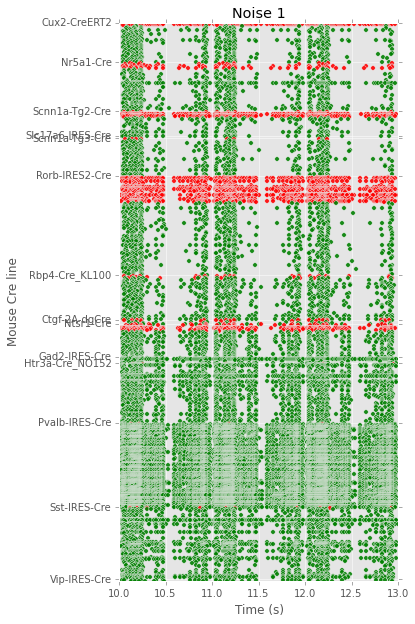

In [186]:
noise_df['layer'] = None
layer = {'Ctgf-2A-dgCre': '6-Ctgf',
            'Cux2-CreERT2': '2-Cux2',
            'Nr5a1-Cre': '4-Nr5a1',
            'Ntsr1-Cre': '6-Ntsr1',
            'Rbp4-Cre_KL100':'5-Rbp4',
            'Rorb-IRES2-Cre': '45-Rorb',
            'Scnn1a-Tg2-Cre': '4-Scnn1a',
            'Scnn1a-Tg3-Cre':'45- Scnn1a',
            'Slc17a6-IRES-Cre':'4-Slc'}

for i in range(len(noise_df)):
    if noise_df['cre_line'].iloc[i] == 'Ntsr1-Cre_GN220':
        noise_df['cre_line'].iloc[i] = 'Ntsr1-Cre'
    try:
        noise_df['layer'].iloc[i] = layer[noise_df['cre_line'].iloc[i]]
    except KeyError:
        pass
noise_df = noise_df.sort(columns = ['cell_type','layer','cre_line','cre_pos'])
cre_lines=[]
cre_line_pos = []
plt.figure(figsize=(5,10))

for i in range(len(noise_df)):
    if noise_df['cre_line'].iloc[i] not in cre_lines:
        cre_lines.append(noise_df['cre_line'].iloc[i])
        cre_line_pos.append(i)
    data_set = ctc.get_ephys_data(noise_df['spec_id'].iloc[i])
    spike_times = data_set.get_spike_times(noise_df['noise_1'].iloc[i])
    if noise_df['cre_pos'].iloc[i] == 'cre reporter negative':
        plt.scatter(spike_times, np.ones(len(spike_times))+i, c='r',alpha = .9)
    else:
        plt.scatter(spike_times, np.ones(len(spike_times))+i, c='g',alpha = .9)

    plt.xlim(10,13)
    plt.ylim(0,len(noise_df))
    plt.xlabel('Time (s)')
    plt.ylabel('Mouse Cre line')
    plt.title('Noise 1')
    plt.yticks(cre_line_pos, cre_lines)
plt.gca().invert_yaxis()

In [222]:
cell_color = {'Cux2-CreERT2':'greenyellow',
 'Nr5a1-Cre':'darkcyan',
 'Scnn1a-Tg2-Cre':'turquoise',
 'Slc17a6-IRES-Cre':'navajowhite',
 'Scnn1a-Tg3-Cre':'aqua',
 'Rorb-IRES2-Cre':'aquamarine',
 'Rbp4-Cre_KL100':'forestgreen',
 'Ctgf-2A-dgCre':'indigo',
 'Ntsr1-Cre':'cyan',
 'Gad2-IRES-Cre':'darkred',
 'Htr3a-Cre_NO152':'saddlebrown',
 'Pvalb-IRES-Cre':'crimson',
 'Sst-IRES-Cre': 'orange',
 'Vip-IRES-Cre': 'fuchsia'}

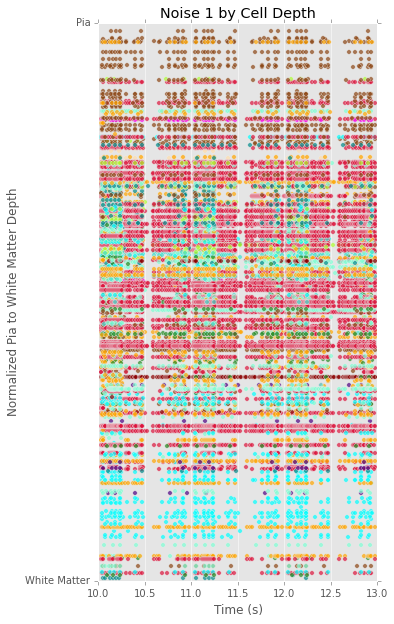

In [227]:
plt.figure(figsize=(5,10))
for i in range(len(noise_df)):
    data_set = ctc.get_ephys_data(noise_df['spec_id'][i])
    spike_times = data_set.get_spike_times(noise_df['noise_1'][i])
    location = cell_index[noise_df['spec_id'][i]]['cell_soma_locations'][0]['normalized_depth']
    plt.scatter(spike_times, np.ones(len(spike_times))*location, c=cell_color[noise_df['cre_line'][i]],
                alpha = .7)
    
    plt.xlim(10,13)
    plt.ylim(0,1)
    plt.xlabel('Time (s)')
    plt.ylabel('Normalized Pia to White Matter Depth')
    plt.title('Noise 1 by Cell Depth')
    plt.yticks([0,1],['Pia','White Matter'])
plt.gca().invert_yaxis()